<a href="https://colab.research.google.com/github/atiwary17/TemporalTales-Delta18OAnalysis/blob/main/game/4_2_Ka_event.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Welcome to Proxy Data Analysis Interactive Activity

In this interactive Python notebook, we will explore the fascinating world of paleoclimatology (the study of past climates). Our journey begins with a video that explains how proxy records and d18O are recorded in sediment data and what can it tell about the past climates. We will also learn how to analyze sediment data using the example of Kotla Dahar, which holds valuable evidence of the 4.2 event, a significant climatic event that impacted ancient civilizations.

Let's start by watching a video that sets the stage for our exploration.


In [1]:
#Let's Import the necessary tools from github repository
!git clone https://github.com/atiwary17/TemporalTales-Delta18OAnalysis.git


Cloning into 'TemporalTales-Delta18OAnalysis'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 116 (delta 38), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (116/116), 4.60 MiB | 18.05 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [2]:
import sys
sys.path.insert(0, '/content/TemporalTales-Delta18OAnalysis/script/')

from master import *

In [3]:
#let's get the video guide
get_video_guide()
#Direct Youtube link: https://www.youtube.com/watch?v=EJL3cIGQMz0

### Exploring Sediment Datasets

Now that we have a basic understanding of sediment data, let's dive into the datasets. You've been provided with five different datasets to analyze. Each dataset contains valuable information about past climate conditions. Your task is to determine if any of them capture an abrupt event like the 4.2 event (abrupt drying conditions about 4200 years ago).
We have already imported the neccessary data through : !git clone https://github.com/atiwary17/TemporalTales-Delta18OAnalysis.git . If you want to look at the data you can follow this link -https://github.com/atiwary17/TemporalTales-Delta18OAnalysis/blob/main/data/Data.xlsx
You'll be using Python code to analyze and visualize these datasets shortly.

In [6]:
#let's see the basic structure of sediment datasets
import pandas as pd

# Specify the raw file URL on GitHub
github_raw_url = 'https://raw.githubusercontent.com/atiwary17/TemporalTales-Delta18OAnalysis/main/data/Data.xlsx'

# Specify the sheet name you want to load
sheet_name = 'D'  #

# Load the data from the specified sheet into a Pandas DataFrame
df_test = pd.read_excel(github_raw_url, sheet_name=sheet_name)

# Check the first few rows of the DataFrame
print(df_test.head())


      Age  %wt Dolo
0  1388.5    1.3094
1  1471.4    1.4174
2  1554.3    1.7926
3  1637.1    1.7566
4  1720.0    1.6667


## Data Analysis and Detecting Abrupt Events

Now, let's roll up our sleeves and start analyzing the datasets. We'll use Python code to plot the data and identify abrupt events. Here's a brief overview of the steps:

1. Load the dataset (already done)
2. Plot the relevant data (e.g., d18O values over time).
3. Look for significant changes or abrupt events.
4. Check the results.

Feel free to explore and analyze each dataset one by one. If you need assistance or have questions, don't hesitate to ask.


{1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E'}


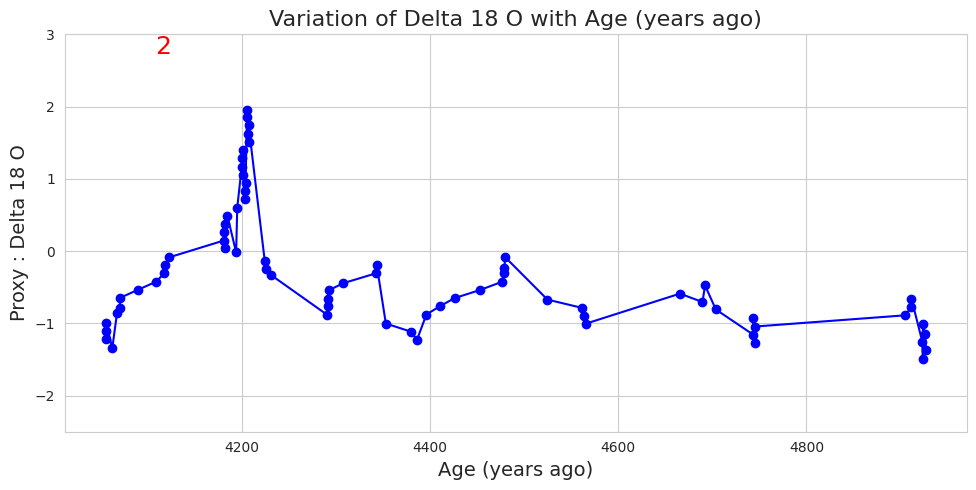

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the raw file URL on GitHub
github_raw_url = 'https://raw.githubusercontent.com/atiwary17/TemporalTales-Delta18OAnalysis/main/data/Data.xlsx'

# Dictionary of sheet names
# List of names
names = ['A', 'B', 'C', 'D', 'E']

# Create a dictionary with integer keys
name_dict = {i+1: name for i, name in enumerate(names)}

# Display the dictionary
print(name_dict)

def has_negative(arr):
    for element in arr:
        if element < 0:
            return True
    return False

#Clean the data
def clean_the_data(input_df):
    # Rename columns based on their positions
    input_df.columns = ['age_CE', 'd18O']

    # Data Cleaning
    # Handle missing values (replace with the median for demonstration)
    input_df['age_CE'].fillna(input_df['age_CE'].median(), inplace=True)

    # Handle outliers (replace with the mean for demonstration)
    d18O_mean = input_df['d18O'].mean()
    d18O_std = input_df['d18O'].std()
    #input_df['d18O'] = input_df['d18O'].apply(lambda x: d18O_mean if abs(x - d18O_mean) > 2 * d18O_std else x)
    return input_df


def plot_data(sheet_key):
    # Get the sheet name based on the key from name_dict
    sheet_name = name_dict[sheet_key]
    #print(sheet_name)

    # Load the data from the specified sheet into a Pandas DataFrame
    df = pd.read_excel(github_raw_url, sheet_name=sheet_name, skiprows=1)
    df = clean_the_data(df)
    # Check the first few rows of the DataFrame
    #print(df.head())

    # Filter the data to include only values up to 5000 on the x-axis (age_CE)
    df_filtered = df[df['age_CE'] <= 5000]
    if has_negative(df_filtered['d18O']):
        #print("The array contains negative values.")
        y_label = 'Proxy : Delta 18 O'
        ylim_low = -2.5
        ylim_up = 3
        title_text = 'Variation of Delta 18 O with Age (years ago)'
    else:
        #print("The array does not contain negative values.")
        y_label = 'Proxy : Dolomite (%w)'
        ylim_low = 1
        ylim_up = 15
        title_text = 'Variation of Dolomite (%w) with Age (years ago)'

    # Set plot style to a clean and compact style
    # Set the seaborn style to whitegrid
    sns.set_style("whitegrid")
    # Create a simple line plot to visualize raw δ18O variations
    plt.figure(figsize=(10, 5))
    plt.plot(df_filtered['age_CE'], df_filtered['d18O'], marker='o', linestyle='-', color='b',label=f'Sheet Key: {sheet_key}')

    # Set plot labels and title
    plt.xlabel('Age (years ago)', fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.title(title_text, fontsize=16)
    # Add sheet key to the title with red color
    plt.text(0.1, 0.95, str(sheet_key), color='red', fontsize=18, transform=plt.gca().transAxes)
    #plt.legend(fontsize=12)

    # Show the plot
    plt.grid(True)
    # Adjust the layout for better spacing
    plt.tight_layout()
    plt.ylim(ylim_low, ylim_up)  # Set the y-axis limits to [0, 7]
    plt.show()

# Example usage: plot data for 'Gulf_of_Oman' (key 1)
plot_data(2)


## Now, let's get ready to test your understanding of 4.2Ka event signature

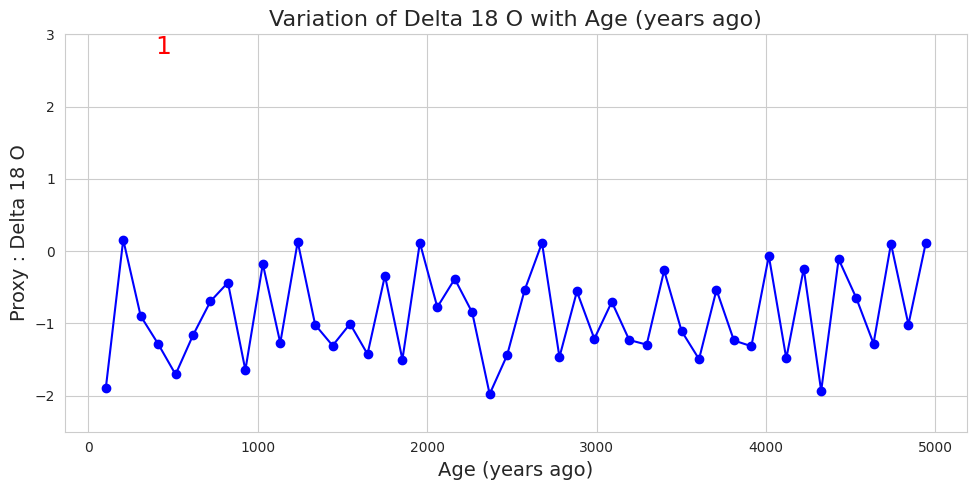

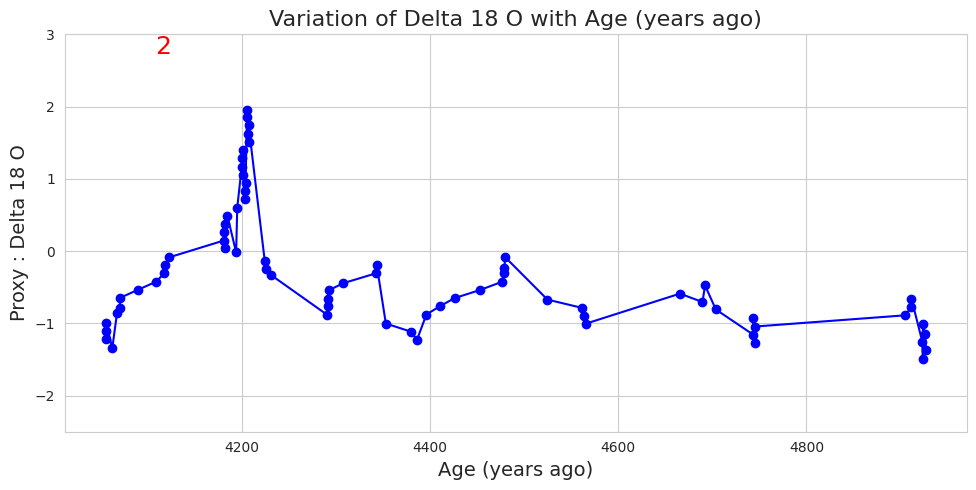

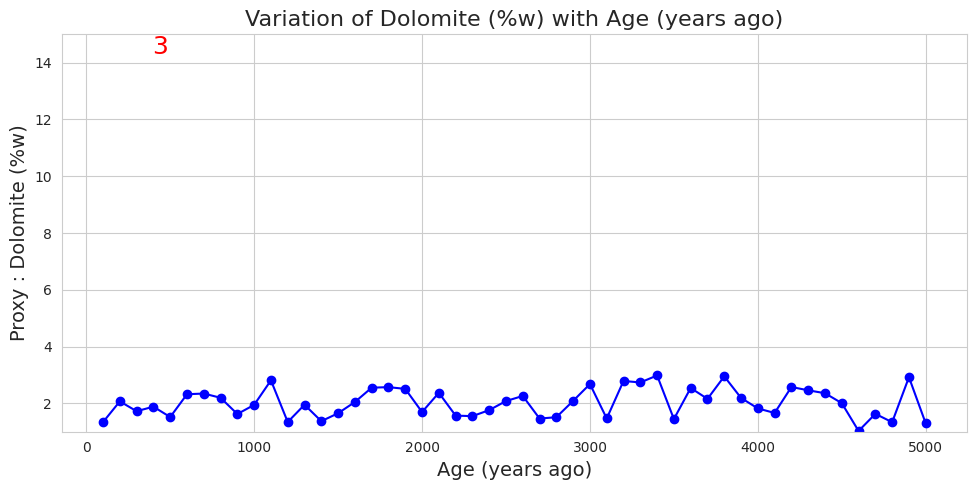

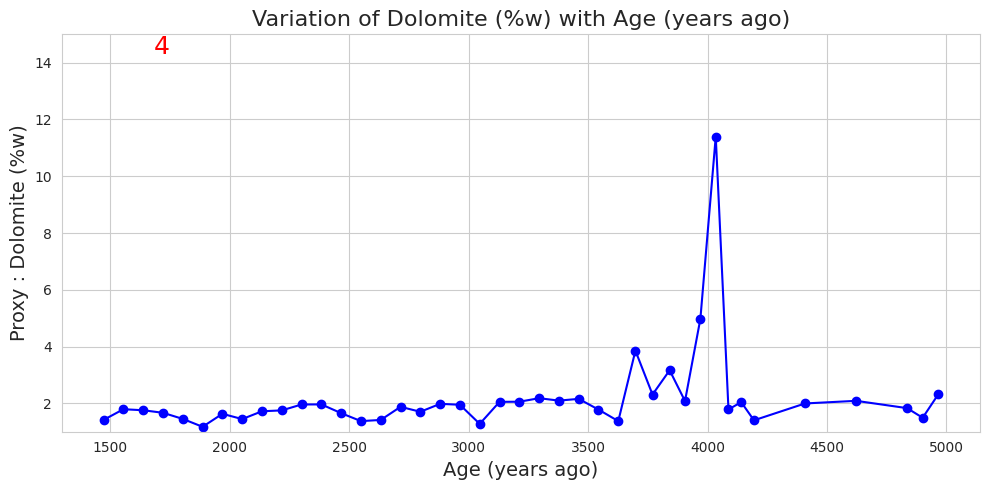

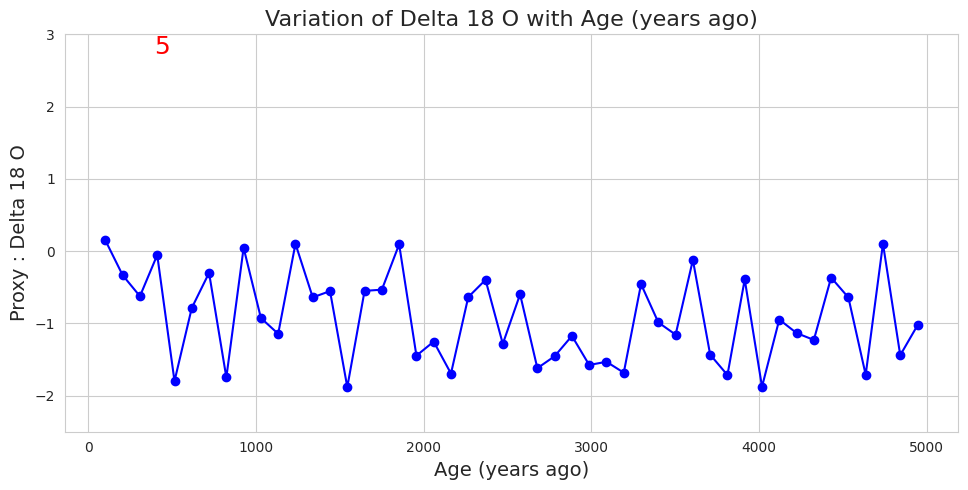

In [9]:
# Let's generate the plots of variation of different proxies over time in which
# you have to find the plot which has the signature of 4.2Ka event
for i in name_dict.keys():
  plot_data(i)

## 4.2 Ka Event Signature Detection Test
 Now let's test if you have correctly idenfied the plots which show the signature of 4.2Ka event

In [10]:
#Call the function to check your results
check_event_capture()


--- Event Capture Checker ---
Available Plots:
1: A
2: B
3: C
4: D
5: E

Enter the plot number (e.g., 1, 2, 3, 4, 5) which you think has captured the 4.2 Ka event: 5

The selected plot ('E') has not captured the 4.2 k event.

Do you still think, there are any other plots that have captured the 4.2 Ka event? (Enter any other key to continue, or 'no' to finish): 

--- Event Capture Checker ---
Available Plots:
1: A
2: B
3: C
4: D
5: E

Enter the plot number (e.g., 1, 2, 3, 4, 5) which you think has captured the 4.2 Ka event: 1

The selected plot ('A') has not captured the 4.2 k event.

Do you still think, there are any other plots that have captured the 4.2 Ka event? (Enter any other key to continue, or 'no' to finish): 4

--- Event Capture Checker ---
Available Plots:
1: A
2: B
3: C
4: D
5: E

Enter the plot number (e.g., 1, 2, 3, 4, 5) which you think has captured the 4.2 Ka event: 1

The selected plot ('A') has not captured the 4.2 k event.

Do you still think, there are any other pl

## Understanding the Results
The geological records from the **Gulf of Oman** and the **Red Sea** provide compelling evidence of a close connection between abrupt drying events around 4200 years ago and the decline or disruptions in the ancient civilizations of Mesopotamia and Egypt. These records, situated in proximity to their respective civilizations (as seen in the map below), indicate **a clear link between environmental changes and societal consequences**. The sudden aridification in both regions likely strained agricultural systems, leading to food shortages, societal unrest, and ultimately contributing to the decline of these once-flourishing ancient societies. This convergence of geological and historical evidence underscores the **profound impact that climate fluctuations can have on human civilization.**

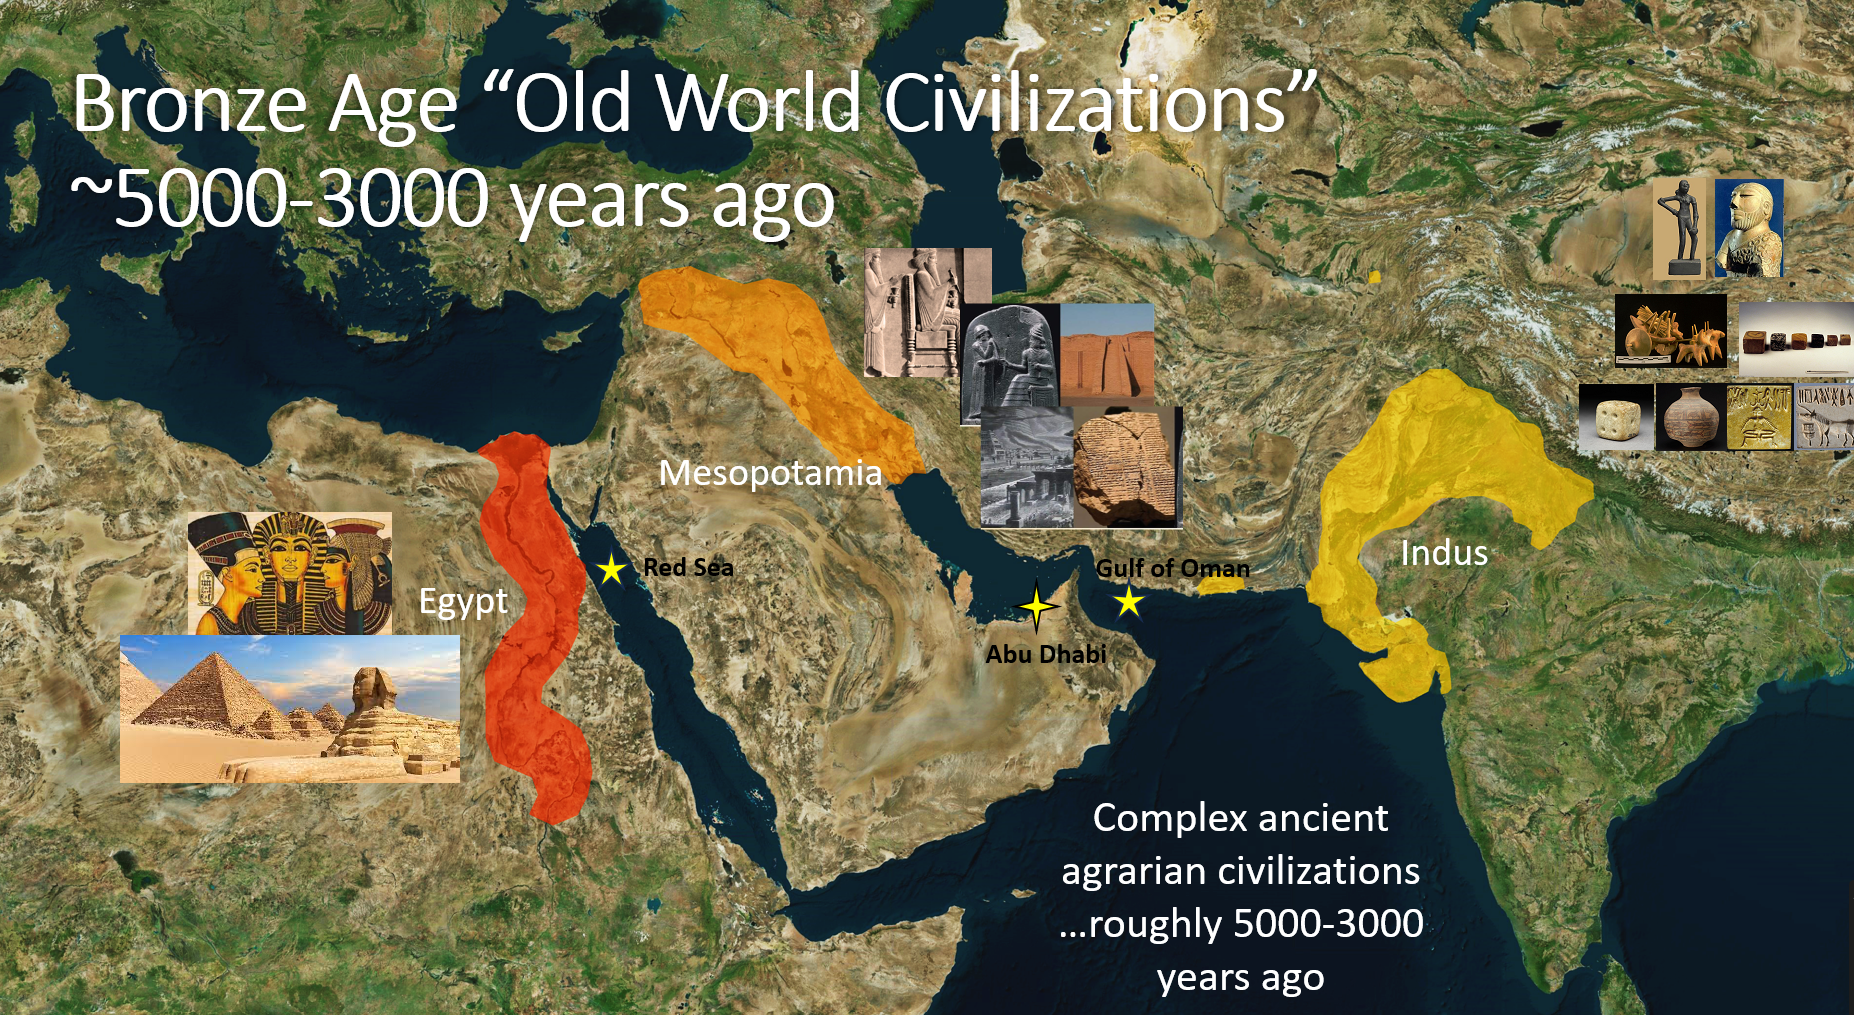

**Interesting fact**: Abu Dhabi is also linked to the Mesopotamian civilization.
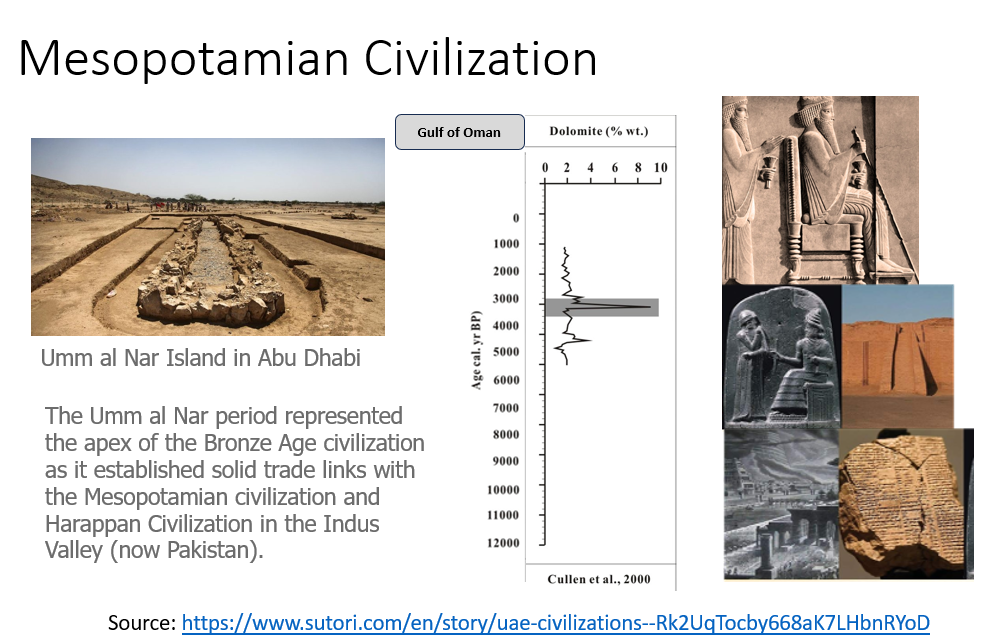

## Conclusion

Congratulations on completing this interactive activity on sediment data analysis and its historical implications. You've not only gained valuable insights into the analysis of sediment data but also explored the fascinating connection between environmental changes and the rise and fall of ancient civilizations.

Feel free to share your findings, ask questions, and engage in discussions about the impact of climate change on human history. We hope you enjoyed this journey!
